# Determinando a área de silhueta de objetos por contagem de pixels.

O propósito deste notebook é determinar a área de silhueta de certos objetos
a partir da contagem de pixels de imagens deles tiradas a distâncias específicas.

O método consiste em contar os pixels de um objeto de áera conhecida
(na mesma distância que todos os outros objetos) e assim determinar a área por pixel nessa distância,
visto que a área por pixel $ A_p = A / \#pixels $.

As amostras tiveram seus tamanhos iniciais medidos, apresentando $ 2,600 \pm 0,005 cm $, portanto uma área de $ 6,760 \pm 0,007 cm^2 $. Todas as fotos foram tiradas à $ 6,690 \pm 0,005 cm $.

## Testes preliminares

Para a contagem de pixels, vamos excluir todos so pixels da imagem abaixo de certa luminosidade, já que as amostras foram tiradas num fundo preto. Desta forma, vamos usar a classe Image do pacote PIL para manipular os pixels, Numpy para manipular os valores e Matplotlib para termos ideia de qual valor usar como limite de luminsodiade.

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

Depois criamos uma função para abrir as imagens e retornar uma array com a contagem de pixels em cada tom. Então fazemos um gráfico do resultado.

In [2]:
def contar_tons(file):
    arr = np.zeros(256)  # cria uma array de 256 zeros, para cada tom de cinza
    with Image.open(file).convert('L') as img_g:  # abre o arquivo e converte para escala de cinza
        largura, altura = img_g.size
        
        for x in np.arange(largura):
            for y in np.arange(altura):
                luminosidade = img_g.getpixel((int(x), int(y)))
                arr[luminosidade] += 1
                
    return arr

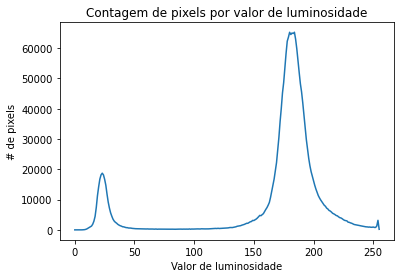

In [3]:
plt.plot(np.arange(256), contar_tons('amostras-mes1/1.jpg'))
plt.title('Contagem de pixels por valor de luminosidade')
plt.xlabel('Valor de luminosidade')
plt.ylabel('# de pixels')
plt.show()

Rodando o teste acima é possível escolher um valor específico de luminosidade para a imagem e dividir claramente o preto do branco. O valor escolhido será 100.

Podemos aplicar um filtro que torne todos os pixels mais escuros que 100 como vermelhos na imagem para identificar como manchas na amostra são tratadas.

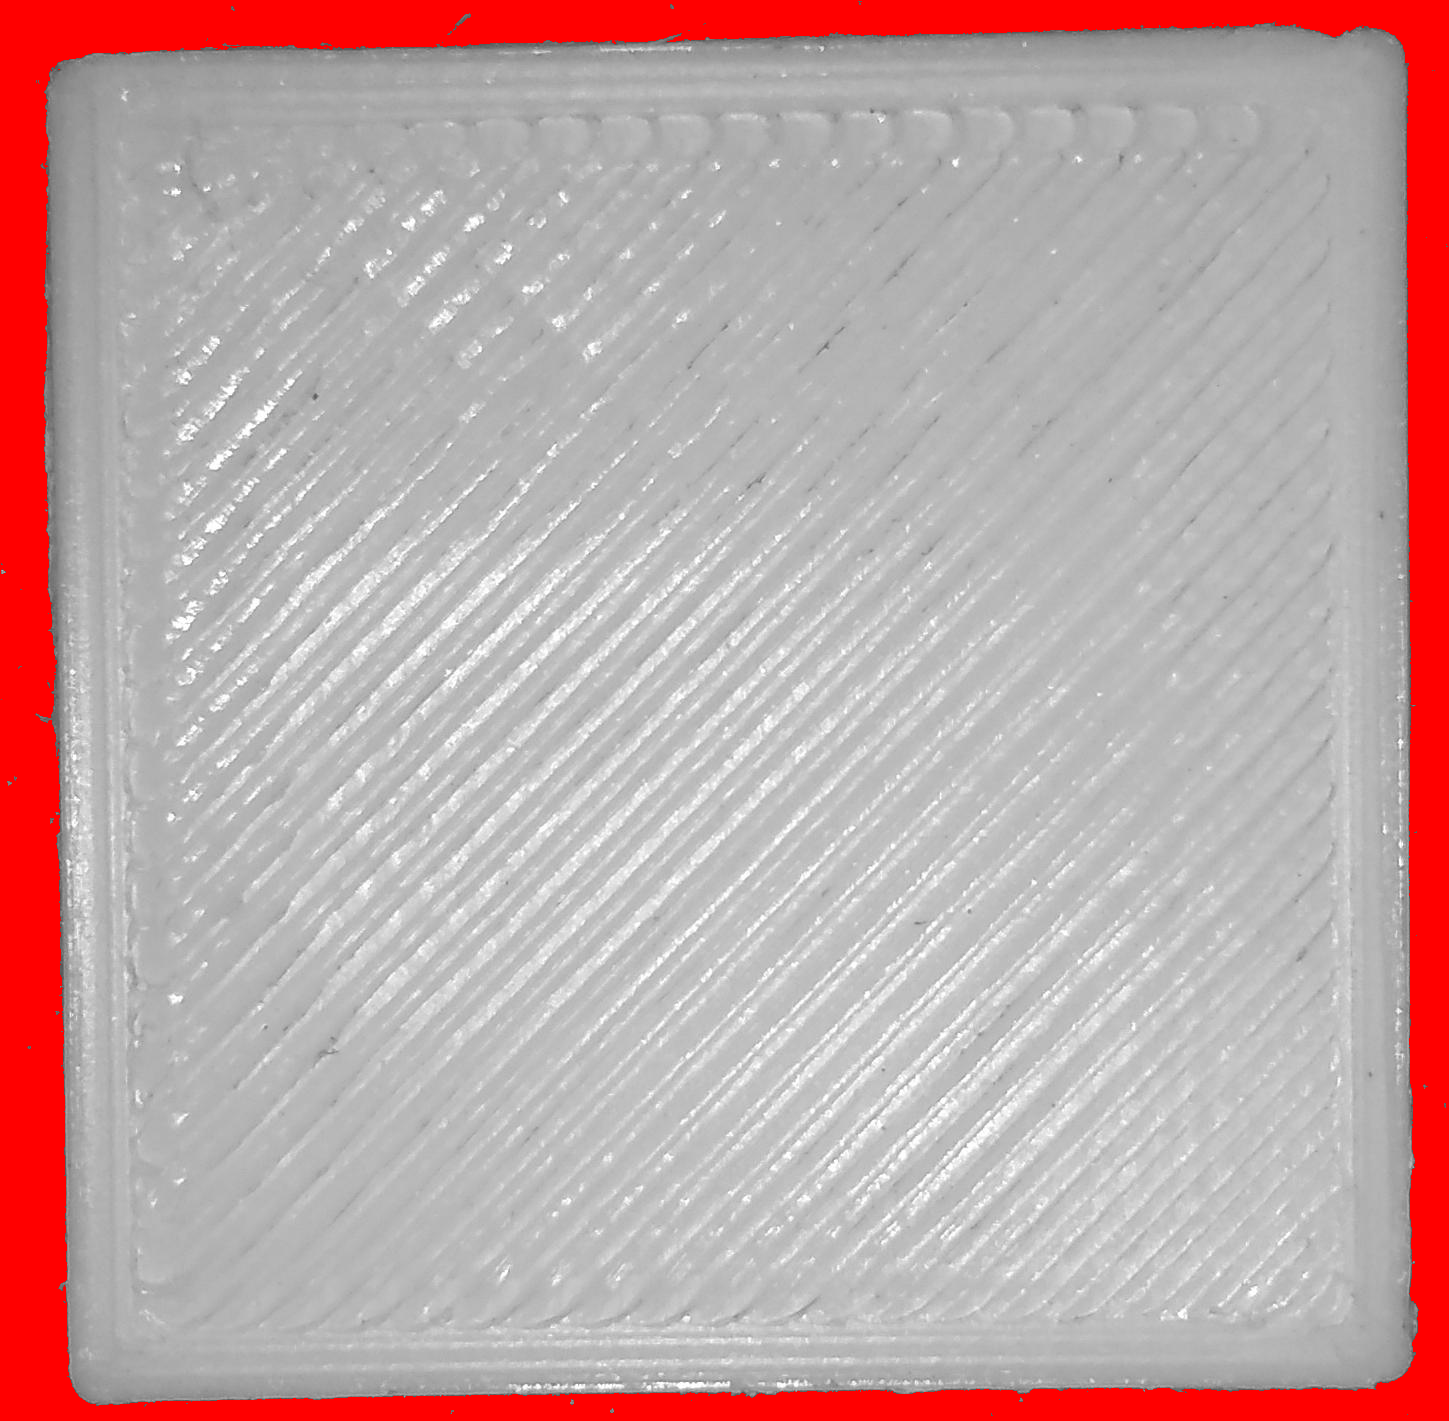

In [4]:
with Image.open('amostras-mes1/1.jpg').convert('L') as img_bw:
    img_rgb = img_bw.convert('RGB')
    largura, altura = img_bw.size
    
    for x in np.arange(largura):
        for y in np.arange(altura):
            if img_bw.getpixel((int(x), int(y))) < 85:
                img_rgb.putpixel((int(x), int(y)), (255, 0, 0))
    
    display(img_rgb)

Como se vê, nenhum pixel interno da amostra está vermelho. Entretanto, ruído externo à amostra foi capitado, mas por ser em quantidades relativamente desprezíveis, não serão tomadas ações para resolver isso.

## Executando a contagem

Dando procedimento ao procesos de contagem, o próximo passo é contar os píxels de todas as imagens da pasta `amostras-mes1`. Primeiro fazemos uma lista de todos os arquivos a serem processados.

In [5]:
arquivos_mes1 = ['1.jpg', '2.jpg', '3.jpg',
                 'AL1.jpg', 'AL2.jpg', 'AL3.jpg',
                 'AS1.jpg', 'AS2.jpg', 'AS3.jpg',
                 'M1.jpg', 'M2.jpg', 'M3.jpg',
                 'R1.jpg', 'R2.jpg', 'R3.jpg',
                 'S1.jpg', 'S2.jpg', 'S3.jpg',
                 'V1.jpg', 'V2.jpg', 'V3.jpg']

Em seguida, fazemos uma função para contar os pixels acima de certo tom e retornar apenas um inteiro com a quantidade. Será uma adaptação da função `contar_tons()`.

In [6]:
def contar(file, minimo):
    count = 0
    with Image.open(file).convert('L') as img_g:  # abre o arquivo e converte para escala de cinza
        largura, altura = img_g.size
        
        for x in np.arange(largura):
            for y in np.arange(altura):
                luminosidade = img_g.getpixel((int(x), int(y)))
                if luminosidade > minimo:
                    count += 1  # adiciona um pixel à contagem total
                
    return count

Por fim pomos em prática, com um loop para cada imagem da lista acima, exceto `1.jpg`, `2.jpg` e `3.jpg`, que servirão de teste do cálculo de área.

In [7]:
counts = np.empty(18)  # lista de contagens, para 18 elementos (21 - 3)
for i in range(18):  # itera pela lista, pulando os 3 primeiros elementos
    counts[i] = contar('amostras-mes1/' + arquivos_mes1[i + 3], 100)

print(counts)

[1836115. 1848205. 1829038. 1821393. 1895776. 1833329. 1830159. 1839800.
 1840311. 1828262. 1832578. 1828765. 1747187. 1741662. 1822365. 1895838.
 1832577. 1824113.]


## Determinação da área de cada píxel

Analizando os dados temos que:

In [8]:
media = np.mean(counts)
desvio_padrao = np.std(counts)

print(media, desvio_padrao, desvio_padrao / media)

1829304.0555555555 36577.216496174566 0.019995154105240394


O que quer dizer que a contagem de pixels por amostra é $ 1829304 \pm 36577 pixels $. Destaca-se que o desvio padrão é de aproximadamente $2\%$ do valor medido.

Assim, retomando o explicado na introdução, sabemos que $ A_p = A / \#pixels $, onde:

$ A = 6,760 \pm 0,007 cm^2 $

$ \#pixels = 1829304 \pm 36577 $

Dessa forma, conclúi-se que $ A_p = (3,695\pm0,078) \times 10^{-6} cm^2/pixel $

## Testando resultados nas amostra de teste

Na etapa de conategm, os arquivos `1.jpg`, `2.jpg` e `3.jpg` foram deixados de lado, para que fossem contados e testados posteriormente. Neste etapa iremos contar os píxels e multiplicar pela área por pixel determinada e assim estipular a área, comparando com o valor empírico.

In [9]:
counts_test = np.empty(3)
for i in range(3):
    counts_test[i] = contar('amostras-mes1/' + arquivos_mes1[i], 100)  # conta os pixels das 3 imagens

media_test = np.mean(counts_test)
desvio_test = np.std(counts_test)

print(media_test, desvio_test, desvio_test / media_test)

1832113.6666666667 1072.297947815293 0.0005852791599804086


Assim, $ \#pixels = 1832113 \pm 1072 $. Considerando o valor de $ A_p $ medido, temos que $ A = 6,770 /pm 0,143 cm^2 $, o que indica que o método apresenta uma precisão de $ 2\% $. Comparando este valor com o esperado, $ 6,760 \pm 0,007 cm^2 $, temos um erro de $ 0,15\% $ em relação ao original. 